In [1]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt

nltk.download(['stopwords', 'punkt', 'wordnet'])
# nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.stem.porter import *
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.cluster import KMeans

from gensim.models import Word2Vec

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/paigelewis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/paigelewis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/paigelewis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [152]:
sentences = [
    'In the past John liked only sport but now he likes sport and politics',
    'Sam only liked politics but now he is fan of both music and politics',
    'Sara likes both books and politics but in the past she only read books',
    'Robert loved both books and nature but now he only reads books',
    'Linda liked books and sport but she only likes sport now',
    'Alison used to loved nature but currently she likes both nature and sport'
]

corpus = []

for sentence in sentences:
    sentence = sentence.lower()
    words = word_tokenize(sentence)
    words = [stemmer.stem(word) for word in words if word not in set(stopwords.words('english'))]
    words = [lemmatizer.lemmatize(word.lower()) for word in words]
    sentence = ' '.join(words)
    corpus.append(sentence)
    
print(corpus)

['past john like sport like sport polit', 'sam like polit fan music polit', 'sara like book polit past read book', 'robert love book natur read book', 'linda like book sport like sport', 'alison use love natur current like natur sport']


In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(use_idf=False, norm='l1')

tf = vectorizer.fit_transform(corpus)

print('List of Features:')
print('-----------------------------------------')
print(vectorizer.get_feature_names())

print()
print('Tf Document-Term Matrix:')
df = pd.DataFrame(tf.toarray(), columns=vectorizer.get_feature_names())
df

List of Features:
-----------------------------------------
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Tf Document-Term Matrix:


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0.000,0.000000,0.000,0.000000,0.142857,0.285714,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.285714,0.000
1,0.000,0.000000,0.000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.000000,0.333333,0.000000,0.000000,0.166667,0.000000,0.000000,0.000
2,0.000,0.285714,0.000,0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,0.000000,0.000000,0.142857,0.000000,0.000
3,0.000,0.333333,0.000,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.000000,0.166667,0.166667,0.000000,0.000000,0.000000,0.000
4,0.000,0.166667,0.000,0.000000,0.000000,0.333333,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000
5,0.125,0.000000,0.125,0.000000,0.000000,0.125000,0.000000,0.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.125


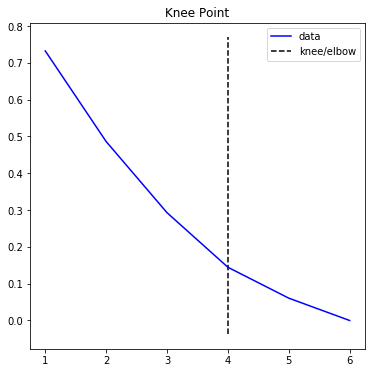

In [154]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,7), sse_scores, curve="convex", direction="decreasing")
kl.plot_knee()
    

In [155]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(df)

words = vectorizer.get_feature_names()

#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-19:-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid)
    word_clusters.append(cluster)
    print(str(num) + ' : ' + cluster)

0 : book, read, robert, natur, love, sara, polit, past, like, use, john, current, fan, music, linda, sport, sam, alison
1 : like, sport, linda, book, john, polit, past, use, current, fan, music, love, natur, read, robert, sam, sara, alison
2 : polit, music, sam, fan, like, love, book, current, john, linda, use, sport, natur, past, read, robert, sara, alison
3 : natur, use, current, like, love, sport, alison, past, polit, read, robert, linda, sam, john, fan, sara, book, music


Cluster: 0
-----------------------------------------------------


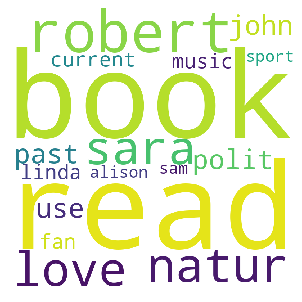

Cluster: 1
-----------------------------------------------------


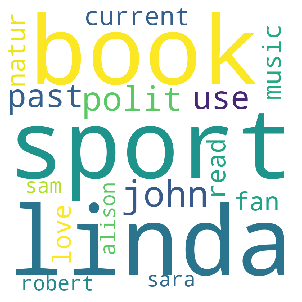

Cluster: 2
-----------------------------------------------------


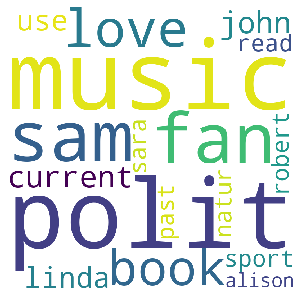

Cluster: 3
-----------------------------------------------------


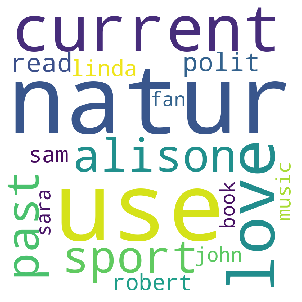

In [156]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [157]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(norm='l2')

tfidf = vectorizer.fit_transform(corpus)

print('List of Features:')
print('-----------------------------------------')
print(vectorizer.get_feature_names())

print()
print('Tf Document-Term Matrix:')
df = pd.DataFrame(tfidf.toarray(), columns=vectorizer.get_feature_names())
df

List of Features:
-----------------------------------------
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Tf Document-Term Matrix:


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0.00000,0.000000,0.00000,0.000000,0.441993,0.452889,0.000000,0.000000,0.000000,0.000000,0.362440,0.305997,0.000000,0.000000,0.000000,0.000000,0.611994,0.00000
1,0.00000,0.000000,0.00000,0.439389,0.000000,0.225111,0.000000,0.000000,0.439389,0.000000,0.000000,0.608389,0.000000,0.000000,0.439389,0.000000,0.000000,0.00000
2,0.00000,0.618987,0.00000,0.000000,0.000000,0.229032,0.000000,0.000000,0.000000,0.000000,0.366582,0.309494,0.366582,0.000000,0.000000,0.447043,0.000000,0.00000
3,0.00000,0.623322,0.00000,0.000000,0.000000,0.000000,0.000000,0.369149,0.000000,0.369149,0.000000,0.000000,0.369149,0.450174,0.000000,0.000000,0.000000,0.00000
4,0.00000,0.328320,0.00000,0.000000,0.000000,0.485929,0.474237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.656641,0.00000
5,0.37519,0.000000,0.37519,0.000000,0.000000,0.192220,0.000000,0.307662,0.000000,0.615323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.259749,0.37519


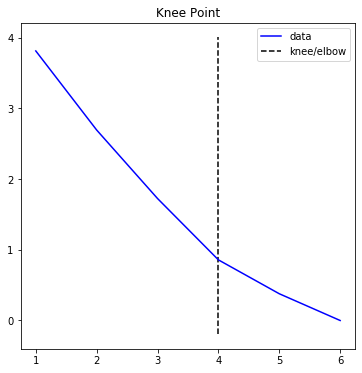

In [159]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,7), sse_scores, curve="convex", direction="decreasing", S=0.85)
kl.plot_knee()

In [136]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(df)

words = vectorizer.get_feature_names()

#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-19:-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid)
    word_clusters.append(cluster)
    print(str(num) + ' : ' + cluster)

0 : book, read, robert, sara, natur, love, past, polit, like, use, john, current, fan, music, linda, sport, sam, alison
1 : sport, like, linda, john, past, book, polit, use, current, fan, music, love, natur, read, robert, sam, sara, alison
2 : polit, music, sam, fan, like, love, book, current, john, linda, use, sport, natur, past, read, robert, sara, alison
3 : natur, use, current, alison, love, sport, like, robert, read, polit, past, sam, linda, john, fan, sara, book, music


Cluster: 0
-----------------------------------------------------


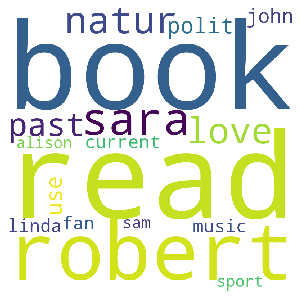

Cluster: 1
-----------------------------------------------------


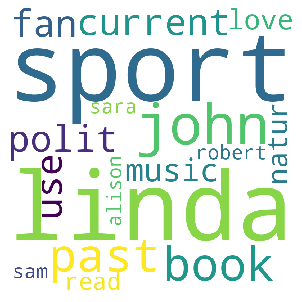

Cluster: 2
-----------------------------------------------------


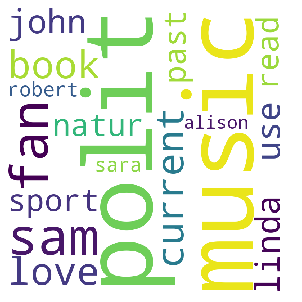

Cluster: 3
-----------------------------------------------------


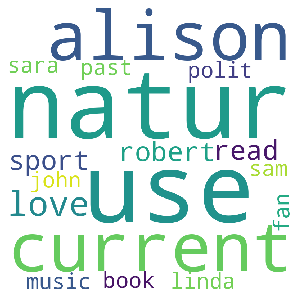

In [137]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [138]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

bow = vectorizer.fit_transform(corpus)

print('List of Features:')
print('-----------------------------------------')
print(vectorizer.get_feature_names())

print()
print('Tf Document-Term Matrix:')
df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names())
df

List of Features:
-----------------------------------------
['alison', 'book', 'current', 'fan', 'john', 'like', 'linda', 'love', 'music', 'natur', 'past', 'polit', 'read', 'robert', 'sam', 'sara', 'sport', 'use']

Tf Document-Term Matrix:


,alison,book,current,fan,john,like,linda,love,music,natur,past,polit,read,robert,sam,sara,sport,use
0,0,0,0,0,1,2,0,0,0,0,1,1,0,0,0,0,2,0
1,0,0,0,1,0,1,0,0,1,0,0,2,0,0,1,0,0,0
2,0,2,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0
3,0,2,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0
4,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,2,0
5,1,0,1,0,0,1,0,1,0,2,0,0,0,0,0,0,1,1


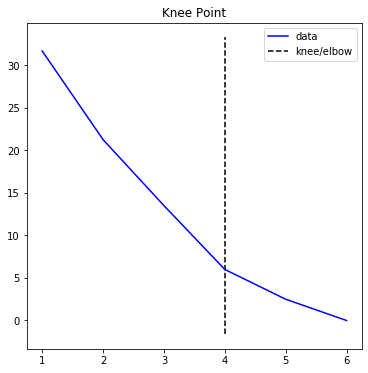

In [139]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,7), sse_scores, curve="convex", direction="decreasing")
kl.plot_knee()

In [140]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(df)

words = vectorizer.get_feature_names()

#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-19:-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid)
    word_clusters.append(cluster)
    print(str(num) + ' : ' + cluster)

0 : book, read, sara, robert, polit, past, natur, love, like, use, john, current, fan, music, linda, sport, sam, alison
1 : like, sport, linda, book, john, polit, past, use, current, fan, music, love, natur, read, robert, sam, sara, alison
2 : natur, use, current, like, love, sport, alison, past, polit, read, robert, linda, sam, john, fan, sara, book, music
3 : polit, music, sam, fan, like, love, book, current, john, linda, use, sport, natur, past, read, robert, sara, alison


Cluster: 0
-----------------------------------------------------


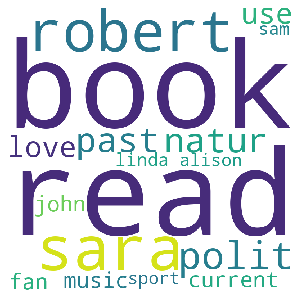

Cluster: 1
-----------------------------------------------------


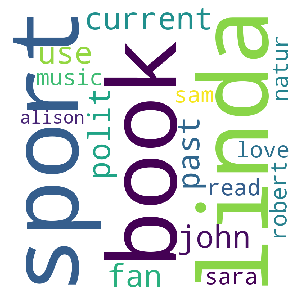

Cluster: 2
-----------------------------------------------------


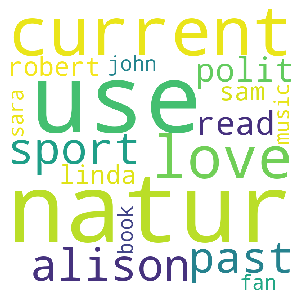

Cluster: 3
-----------------------------------------------------


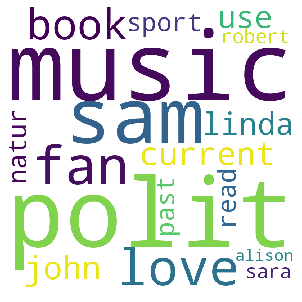

In [141]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [142]:
w2v_corpus = [sent.split() for sent in corpus]

model = Word2Vec(w2v_corpus, size=12, window=3, min_count=0)

# Get the ordered list of words in the vocabulary
words = model.wv.vocab.keys()

# Make a dict
w2vec = {word:model.wv[word] for word in words}

df = pd.DataFrame(w2vec, columns=words)
df

,past,john,like,sport,polit,sam,fan,music,sara,book,read,robert,love,natur,linda,alison,use,current
0,0.026499,0.024138,0.023553,-0.015754,0.021442,-0.021042,0.005674,0.005502,-0.023955,-0.026814,-0.005846,0.034150,0.024756,-0.028947,0.032585,-0.002569,-0.014253,-0.006418
1,0.020101,0.037533,0.016205,0.001430,0.037494,0.041153,0.015978,-0.036380,0.004480,0.024156,0.029461,0.011168,0.024644,0.025543,-0.003447,-0.015580,0.009424,0.025869
2,-0.039949,0.026286,0.033801,0.003193,-0.004335,-0.012469,0.016167,0.010969,-0.007399,-0.003602,0.020157,0.014119,-0.025370,-0.030969,-0.030616,0.033782,-0.021575,-0.007441
3,0.039113,0.031385,0.015473,-0.000026,0.026343,0.006035,-0.000207,-0.006423,-0.006001,-0.001402,-0.026255,-0.025483,-0.016031,-0.038587,0.019683,-0.037392,-0.018563,-0.012338
4,0.005486,-0.024378,0.012849,0.039677,-0.017241,0.015238,-0.003779,0.006329,-0.025561,-0.011263,0.009904,0.014190,-0.011607,0.037430,0.022337,0.004909,0.001750,0.028282
5,0.001966,0.024518,-0.036406,-0.031705,-0.002010,0.040144,-0.029730,0.013604,-0.015761,0.000247,0.041682,-0.014979,0.027942,0.032842,0.036424,0.018184,0.018873,0.039762
6,0.024918,0.005225,0.038868,-0.031522,0.029004,0.030135,-0.029988,-0.013309,-0.011220,-0.010275,-0.012333,-0.008404,-0.024212,0.000088,0.027155,0.016718,0.011469,-0.011956
7,0.013835,-0.032304,0.017656,-0.035612,0.033389,-0.011554,-0.033572,-0.026479,0.002772,-0.040438,0.009548,-0.010143,-0.012957,-0.010279,0.036968,-0.017744,0.034930,-0.026591
8,-0.025156,0.021352,-0.016282,-0.020136,0.011537,-0.033303,-0.031906,-0.002853,-0.011631,-0.036970,0.030660,0.032645,0.010746,-0.014354,0.037475,-0.014144,-0.037841,0.003840
9,0.005872,0.040209,-0.009146,0.003413,-0.011082,0.022499,0.022223,0.040917,0.024450,0.018687,-0.039089,-0.007745,0.040486,-0.016982,-0.034353,0.040508,-0.040779,0.013603


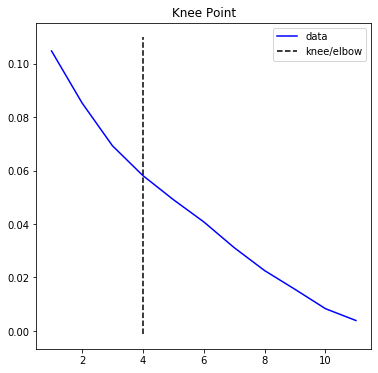

In [143]:
from kneed import KneeLocator

sse_scores = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5, max_iter=1000)
    kmeans.fit(df)
    sse_scores.append(kmeans.inertia_)

kl = KneeLocator(range(1,12), sse_scores, curve="convex", direction="decreasing")
kl.plot_knee()

In [144]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=5, max_iter=1000)
kmeans.fit(df)

words = list(model.wv.vocab.keys())

#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-19:-1]
word_clusters = []
for num, centroid in enumerate(common_words):
    cluster = ', '.join(words[word] for word in centroid)
    word_clusters.append(cluster)
    print(str(num) + ' : ' + cluster)

0 : alison, john, music, fan, like, sara, love, book, sam, sport, robert, current, polit, read, past, natur, use, linda
1 : john, polit, past, like, linda, love, robert, music, current, natur, sara, sam, fan, read, sport, alison, use, book
2 : sam, natur, current, read, linda, love, john, use, past, polit, book, robert, sport, alison, like, music, fan, sara
3 : linda, polit, like, use, past, sam, alison, read, sara, natur, robert, john, love, current, music, book, fan, sport


Cluster: 0
-----------------------------------------------------


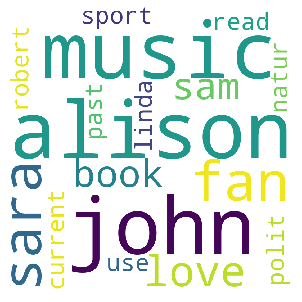

Cluster: 1
-----------------------------------------------------


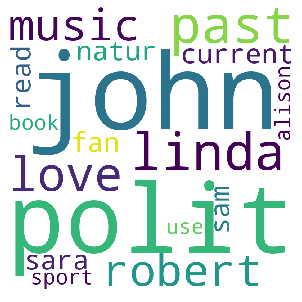

Cluster: 2
-----------------------------------------------------


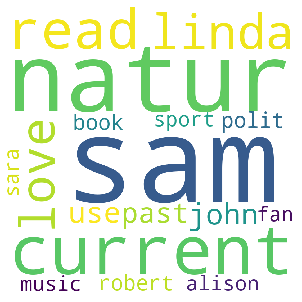

Cluster: 3
-----------------------------------------------------


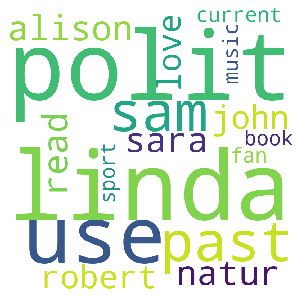

In [145]:
for i in range(4):
    print(f'Cluster: {i}')
    print('-----------------------------------------------------')
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    min_font_size = 10).generate(word_clusters[i])

    # plot the WordCloud image                      
    plt.figure(figsize = (4, 4), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()